## Gokul D

# **Data Science Intern - LGMVIP**

### Task - 4 : Handwritten Digits Classification using NEURAL NETWORKS From MNIST Dataset

Advanced Level

In [60]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Loading the MNIST dataset

In [78]:
(x_train, y_train), (x_test, y_test) = load_data()

### Reshaping the training and testing data

In [62]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

### Normalizing the values of pixels of images

In [63]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

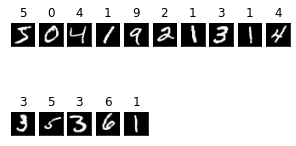

In [64]:
fig = plt.figure(figsize = (5,3))

for i in range(15):
  ax = fig.add_subplot(2, 10, i+1, xticks = [], yticks = [])
  ax.imshow(np.squeeze(x_train[i]), cmap = 'gray')
  ax.set_title(y_train[i])

### Determining the shape of the input images

In [65]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


### Defining the model

In [66]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape = img_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation = 'relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='softmax'))

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)              

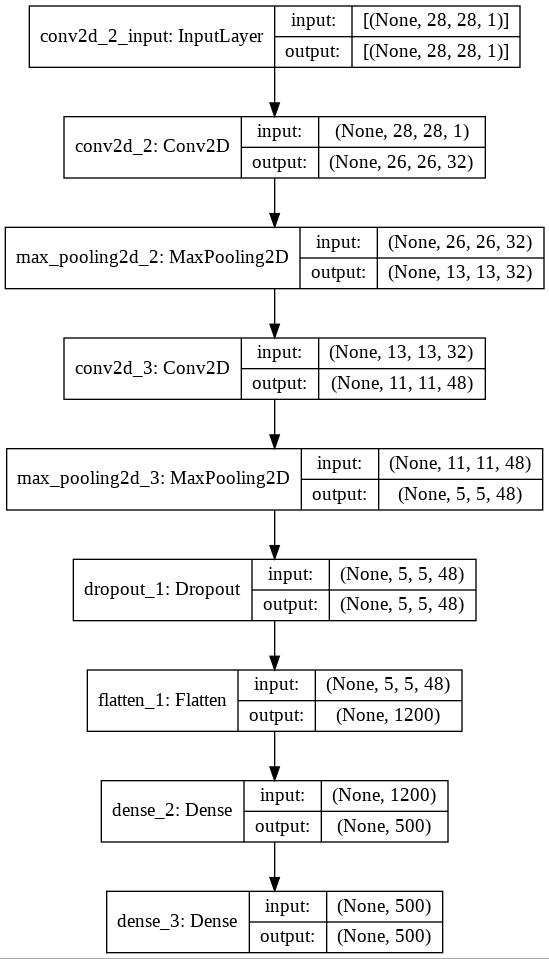

In [68]:
plot_model(model, 'model.jpg', show_shapes = True)

In [69]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

x = model.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose = 2, validation_split = 0.1)

Epoch 1/10
422/422 - 42s - loss: 0.3739 - accuracy: 0.8955 - val_loss: 0.0684 - val_accuracy: 0.9800
Epoch 2/10
422/422 - 42s - loss: 0.0984 - accuracy: 0.9697 - val_loss: 0.0423 - val_accuracy: 0.9875
Epoch 3/10
422/422 - 41s - loss: 0.0712 - accuracy: 0.9777 - val_loss: 0.0345 - val_accuracy: 0.9905
Epoch 4/10
422/422 - 41s - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0320 - val_accuracy: 0.9907
Epoch 5/10
422/422 - 41s - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0296 - val_accuracy: 0.9922
Epoch 6/10
422/422 - 41s - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0278 - val_accuracy: 0.9917
Epoch 7/10
422/422 - 41s - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0260 - val_accuracy: 0.9932
Epoch 8/10
422/422 - 41s - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0243 - val_accuracy: 0.9925
Epoch 9/10
422/422 - 41s - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0283 - val_accuracy: 0.9917
Epoch 10/10
422/422 - 41s - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0251 - val_accura

In [70]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Accuracy : {accuracy*100}')

Accuracy : 99.27999973297119


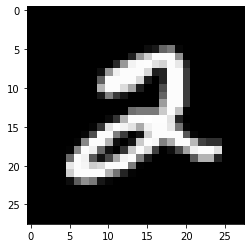

In [71]:
image = x_train[5]

# Lets display the image which we want to predict

plt.imshow(np.squeeze(image), cmap = 'gray')
plt.show()

In [72]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print("Predicted : {}".format(argmax(p)))

Predicted : 2
